# Customer Retention Data Analysis

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty.
* Five major factors that contributed to the success of an e-commerce store have been identified as 
    * service quality
    * system quality
    * information quality
    * trust and net benefit. 

#### As shown in the below figure we will be analyzing the entire dataset by fragmenting it into different groups according to : 1) Hedonic Values and 2) Utilitarian Values

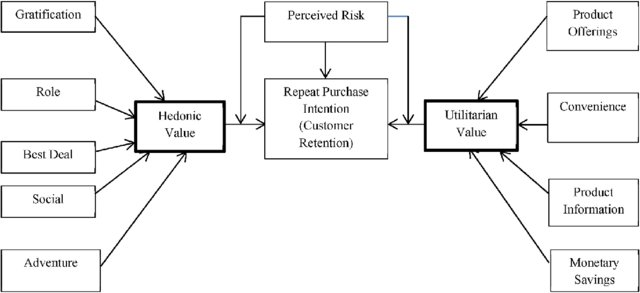

### Analysis of  the data characteristics

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the excel file(dataset)
df=pd.read_excel("customer_retention_dataset.xlsx")
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [3]:
#renaming the columns for ease of understanding 
df.columns=['Gender','Age','City','Pincode','Shopping years','Online purchase in the past 1 year',
            'Internet access','Access device','Screen size of your mobile device','OS of device',
            'Browser','Channel','Medium of next visit','Explore time','Preferred payment option',
            'Abandon frequency','Abandon reason','Easy to read and understand content',
            'Information on similar product','Complete information on listed seller and product',
            'All relevant information on listed products','Ease of navigation in website',
            'Loading and processing speed','User friendly Interface','Convenient Payment methods',
            'Trust for stipulated time','Empathy','Customer privacy gurantee',
            'Responsiveness/availability of communication channels','Monetary benefit and discounts',
            'Enjoyment derived','Convenience/flexiblility','Return and replacement policy',
            'Access to loyalty programs','Display of quality information','Satisfaction',
            'Net Benefit','Trust','Wide variety of listed product',
            'Complete and relevant product information','Monetary savings',
            'Convenience of patronizing','Sense of adventure','Enhancement of social status',
            'Gratification','Fulfillment of certain roles','Value for money spent',''
            'Online retailers customer shopped from','Easy to use website/application',
            'visual appeal', 'Wild variety of product on offer',
            'Complete, relevant description information of products','Loading time',
            'Reliability', 'Quickness to complete purchase',
            'Availability of several payment options','Speedy order delivery ',
            'Privacy of customers’ information', 'Security of customer financial information',
            'Perceived Trustworthiness','Presence of online assistance through multi-channel',
            'Longer time to get logged in','Longer time in displaying graphics and photos',
            'Late declaration of price','Longer page loading time',
            'Limited mode of payment on most products','Longer delivery period',
            'Change in website/Application design',
            'Frequent disruption when moving from one page to another',
            'Website efficiency','Recommended online retailer']

In [4]:
#cross check if the columns are renamed properly 
df.sample()

,Gender,Age,City,Pincode,Shopping years,Online purchase in the past 1 year,Internet access,Access device,Screen size of your mobile device,OS of device,...,Longer time to get logged in,Longer time in displaying graphics and photos,Late declaration of price,Longer page loading time,Limited mode of payment on most products,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website efficiency,Recommended online retailer
36,Male,31-40 years,Noida,201305,Less than 1 year,Less than 10 times,Mobile internet,Smartphone,5.5 inches,Android,...,"Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com",Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com"


In [5]:
#checking the shape of dataset
df.shape

(269, 71)

* The dataset has 71 columns and 269 rows

In [6]:
#view the data type of each column
df.dtypes

Gender                                                      object
Age                                                         object
City                                                        object
Pincode                                                      int64
Shopping years                                              object
                                                             ...  
Longer delivery period                                      object
Change in website/Application design                        object
Frequent disruption when moving from one page to another    object
Website efficiency                                          object
Recommended online retailer                                 object
Length: 71, dtype: object

#### observation:
    
* pincode is int64 type rest of the columns are object

In [7]:
#complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Gender                                                    269 non-null    object
 1   Age                                                       269 non-null    object
 2   City                                                      269 non-null    object
 3   Pincode                                                   269 non-null    int64 
 4   Shopping years                                            269 non-null    object
 5   Online purchase in the past 1 year                        269 non-null    object
 6   Internet access                                           269 non-null    object
 7   Access device                                             269 non-null    object
 8   Screen size of your mobile dev

#### Observations:

* There are no null values in the dataset
* "Pincode" column is the only column with integer datatype
* Rest of the columns are object type
* There are 269 values and indexing starts from 0 to 268

In [8]:
#checking if there are any null values in the dataset
df.isnull().sum()

Gender                                                      0
Age                                                         0
City                                                        0
Pincode                                                     0
Shopping years                                              0
                                                           ..
Longer delivery period                                      0
Change in website/Application design                        0
Frequent disruption when moving from one page to another    0
Website efficiency                                          0
Recommended online retailer                                 0
Length: 71, dtype: int64

#### Observation:
    
    * There are no null values in the dataset i.e the dataset does not have any NaN entries

In [9]:
#alternate way to check for nan values
df.isnull().values.any()

False

In [10]:
#print unique values and there count in each column
for cols in df.columns:
    if df[cols].dtypes=='object':
        print(str(cols)+ ':' + str(df[cols].unique()))
        print(df[cols].value_counts())
        print("-------------------------------------------------------------------------")
        print('\n')

Gender:['Male' 'Female']
Female    181
Male       88
Name: Gender, dtype: int64
-------------------------------------------------------------------------


Age:['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
-------------------------------------------------------------------------


City:['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
-------------------------------------------------------------------------


Shopping years:['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-

#### As we can see there is a typing error for mobile internet we shall merge it

In [11]:
print(df['Internet access'].value_counts())
#As we can see there is a typing error for mobile internet we shall merge it
print('\n')
print("value counts after merging")
print('\n')
df['Internet access']=df['Internet access'].replace({'Mobile internet':'Mobile Internet'})
print(df['Internet access'].value_counts())

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: Internet access, dtype: int64


value counts after merging


Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: Internet access, dtype: int64


### Visualizations

### Studying  general information about the audience from whom the survey has been conducted

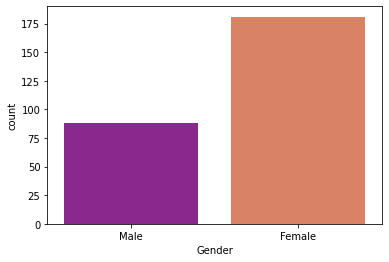

In [12]:
#plotting the count of males and females
sns.countplot(df['Gender'],palette='plasma')
plt.show()
#print(df['Gender'].value_counts())

#### Observation:
    
* There are 181 females which contribute to majority

* The number of males in the dataset are 81

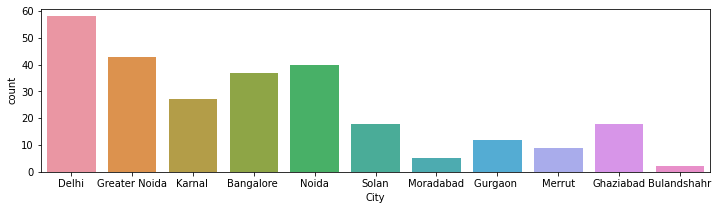

In [13]:
#check which city did the respondents shop from
plt.figure(figsize=(12,3))
sns.countplot(df['City'])
plt.show()

#### Observation:
    
* Cities like Delhi,Greater Noida,Noida and Bangalore were more likely to purchase from e-retail websites

* The least purchases were recorded for Bulandshahr 

* while other cities had moderate frequency.

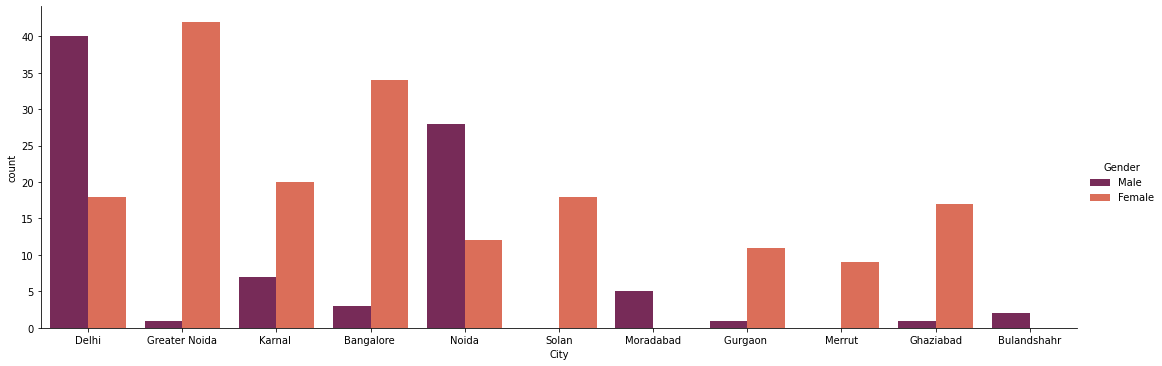

City           Gender
Bangalore      Female    34
               Male       3
Bulandshahr    Male       2
Delhi          Male      40
               Female    18
Ghaziabad      Female    17
               Male       1
Greater Noida  Female    42
               Male       1
Gurgaon        Female    11
               Male       1
Karnal         Female    20
               Male       7
Merrut         Female     9
Moradabad      Male       5
Noida          Male      28
               Female    12
Solan          Female    18
Name: Gender, dtype: int64


In [14]:
#which gender v/scity
sns.catplot(x='City', kind="count",hue="Gender",palette='rocket', data=df,height=5,aspect=3)
plt.show()
print(df.groupby('City')["Gender"].value_counts())

#### Observation:
    
* From each city there were more number of females as compared to males who made purchase from online website/applications.
* Females from Greater Noida were the most followed by bangalore.
* No records were found for males in 'Solan city' and 'Merut'i.e there were only females.
* In Bulandshahr there were only male customers

In [15]:
#frequency table for gender and city
gender_city = pd.crosstab(index=df["Gender"], 
                            columns=df["City"],
                             margins=True)   # Include row and column totals

gender_city

City,Bangalore,Bulandshahr,Delhi,Ghaziabad,Greater Noida,Gurgaon,Karnal,Merrut,Moradabad,Noida,Solan,All
Gender,,,,,,,,,,,,
Female,34,0,18,17,42,11,20,9,0,12,18,181
Male,3,2,40,1,1,1,7,0,5,28,0,88
All,37,2,58,18,43,12,27,9,5,40,18,269


#### observation

* the highest number of people were from Delhi followed by Greater Noida.

* Bulandshahr and Moradabad has the least records

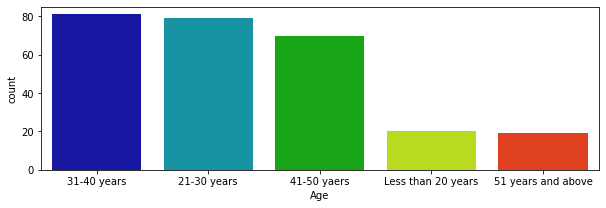

In [16]:
#count of age group
plt.figure(figsize=(10,3))
sns.countplot(df['Age'],palette='nipy_spectral')
plt.show()

#### Observation:
    
* The survey mostly included people falling in age group of 31-40 years and 21-30 year
* people below 20 years of age and above 51 years of age were less in number
* frequency of respondents/records between 41-50 years of age was also somewhat good 
* Thus we can say the majority of respondents consisited of youngsters i.e people from age 21-40 years

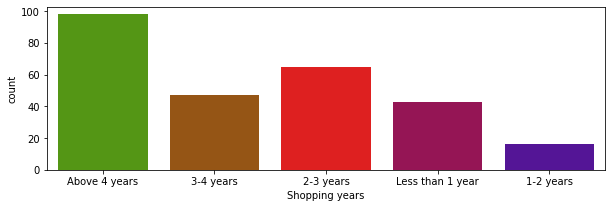

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping years, dtype: int64


In [17]:
#since how long is the respondent shopping
plt.figure(figsize=(10,3))
sns.countplot(df['Shopping years'],palette='brg_r')
plt.show()
print(df['Shopping years'].value_counts())

#### Observation:
    
* Most of the respondents are shopping for more than 4 years with least as 1-2 years

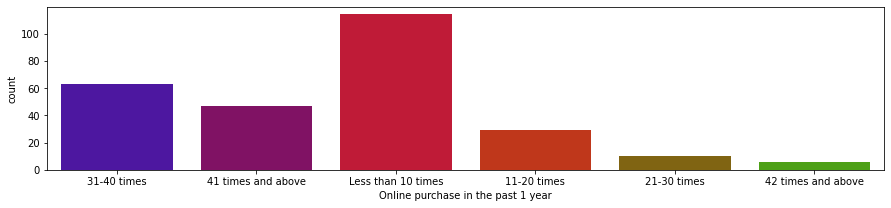

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: Online purchase in the past 1 year, dtype: int64


In [18]:
#Number of Online purchases made in the past 1 year'
plt.figure(figsize=(15,3))
sns.countplot(df['Online purchase in the past 1 year'],palette='brg')
plt.show()
print(df['Online purchase in the past 1 year'].value_counts())

#### Observation:
    
* Most of the customers only purchased for less than 10 times in a year
* Moderate number of respondents purchased for 31-40 times in the past year
* customers who purchased for more than 42 times and above were the least

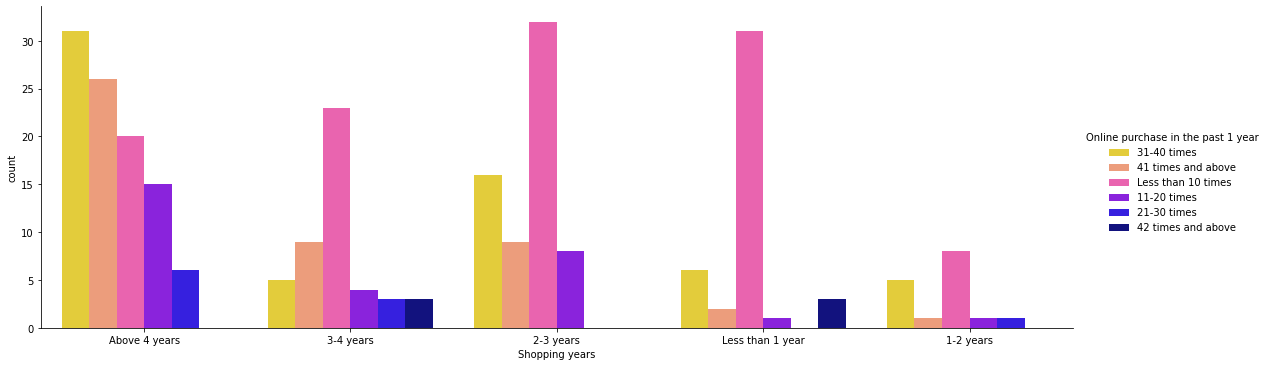

Shopping years    Online purchase in the past 1 year
1-2 years         Less than 10 times                     8
                  31-40 times                            5
                  11-20 times                            1
                  21-30 times                            1
                  41 times and above                     1
2-3 years         Less than 10 times                    32
                  31-40 times                           16
                  41 times and above                     9
                  11-20 times                            8
3-4 years         Less than 10 times                    23
                  41 times and above                     9
                  31-40 times                            5
                  11-20 times                            4
                  21-30 times                            3
                  42 times and above                     3
Above 4 years     31-40 times                           31
   

In [19]:
#Since How Long customers are Shopping Online v/s number of times customers purchased online in the past 1 year
sns.catplot(x='Shopping years',kind="count",hue="Online purchase in the past 1 year",palette='gnuplot2_r', data=df,height=5,aspect=3,)
plt.show()

print(df.groupby('Shopping years')["Online purchase in the past 1 year"].value_counts())

#### Obseravtaion:
    
* The customers who were shopping from online websites for more than 4 years purchased for 31-40 times in the past year which was the highest record.

* Majority of the customers that were shopping since 3-4 years and 2-3 years ordered online for less than 10 times in a year.

* for all the span we can see customers were more liekly to order for less than 10 times in a year.

* very few customers purchased items for more than 31 times

### Analysis of the device history and modes of access

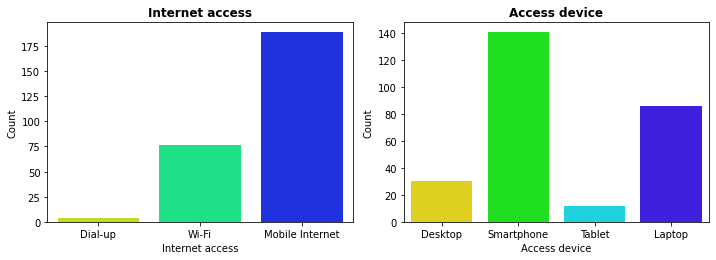

In [20]:
access_list=['Internet access','Access device']
a=1
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,10))
for i in access_list: #loop to plot pie chart
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("Count")
plt.show()

#### Observation for internet access:
    
* Majority of the customers used Mobile Internet to access the online websites/applications.
* Moderate number of customers used Wifi.
* Customers using Dial-up as mode of accessing the online shopping were minimum(least).

#### Observation for device used for internet access

* Most of the customers used Smartphone and laptops to shop online

* Least number of customers used Tablet

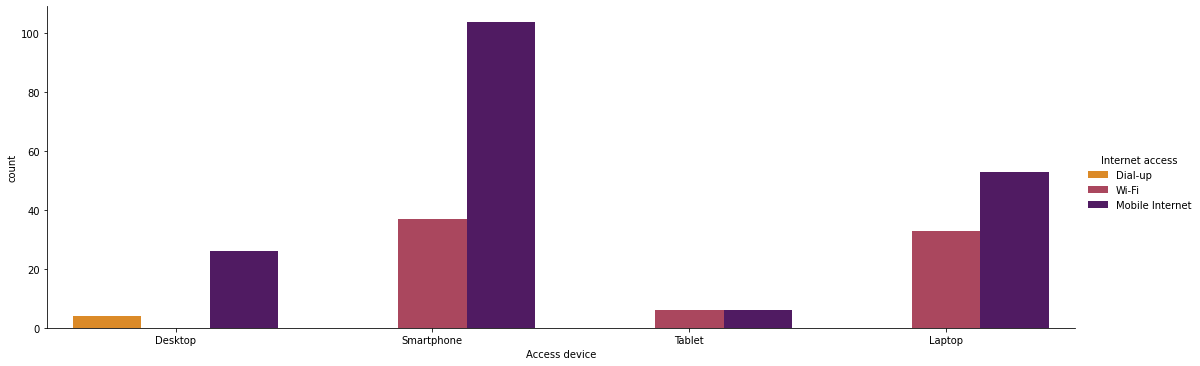

Access device  Internet access
Desktop        Mobile Internet     26
               Dial-up              4
Laptop         Mobile Internet     53
               Wi-Fi               33
Smartphone     Mobile Internet    104
               Wi-Fi               37
Tablet         Mobile Internet      6
               Wi-Fi                6
Name: Internet access, dtype: int64


In [21]:
#mode of internet access v/s device used
sns.catplot(x='Access device',kind="count",hue="Internet access",palette='inferno_r', data=df,height=5,aspect=3,)
plt.show()
print(df.groupby('Access device')["Internet access"].value_counts())

#### Observation 

* The most number of people used mobile internet.

* Out of the total population people using smartphone and laptops used mobile internet as a mode to access internet.

* Only Desktop used the dial-up services

* people using tablets used both mobile internet and wi-fi in equal number i.e 6

In [22]:
#frequency table for access device and internet service used 
access = pd.crosstab(index=df["Internet access"], 
                            columns=df["Access device"],
                             margins=True)   # Include row and column totals

access

Access device,Desktop,Laptop,Smartphone,Tablet,All
Internet access,,,,,
Dial-up,4,0,0,0,4
Mobile Internet,26,53,104,6,189
Wi-Fi,0,33,37,6,76
All,30,86,141,12,269


#### Observations:
    
* mobile internet was used the most by smartphones followed by laptops and then desktop.
* Dial-up was being used by only desktop users and had the least frequency(4)
* Wifi- was used by 33 Laptop and 37 by smartphones

### Analysing the way in which customers arrive/approach a particular e-retail website

Channel
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel, dtype: int64


Medium of next visit
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Medium of next visit, dtype: int64




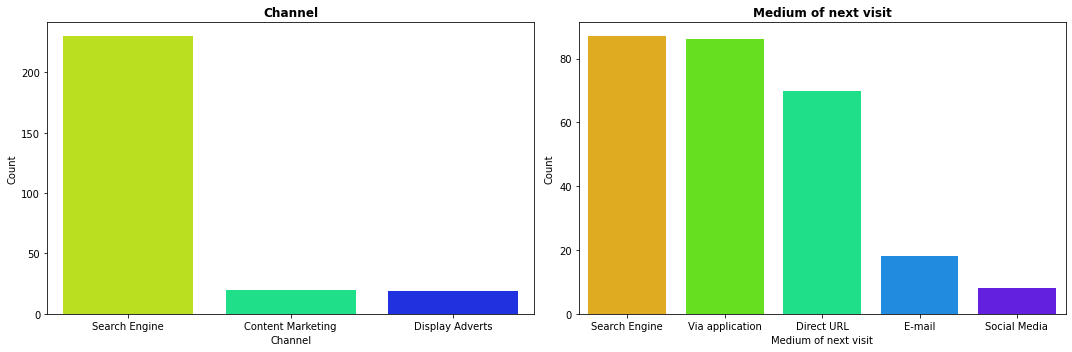

In [23]:
#Which channel did you follow to arrive at your favorite online store for the first time
#After first visit, how do people reach the online retail store?
medium=['Channel','Medium of next visit']
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,5))
for i in medium: #loop to plot pie chart
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("Count")
    print(i)
    print(df[i].value_counts())
    print('\n')
plt.show()
  

#### Observation for which channel did one follow to arrive at favorite online store for the first time:
    
* The majority of the people followed search engines (like 'Google chrome' 'Safari' 'Opera' 'Mozilla Firefox') to visit there favorite e-retail website

* Content Marketing and display adversitements had an equal share of 20-20. Which is quite less as compared to the search engine

#### Observation for how do people reach the online retail store after first visit,? :

* After the first visit people mostly downloaded the e-retail application.

* Also many of them still preffered using the search engines('Google chrome' 'Safari' 'Opera' 'Mozilla Firefox')

* Direct url that was provided too paid a significant role.

* people following email and social media alerts to visit websites were low.

### Analysis of the factors related to time 

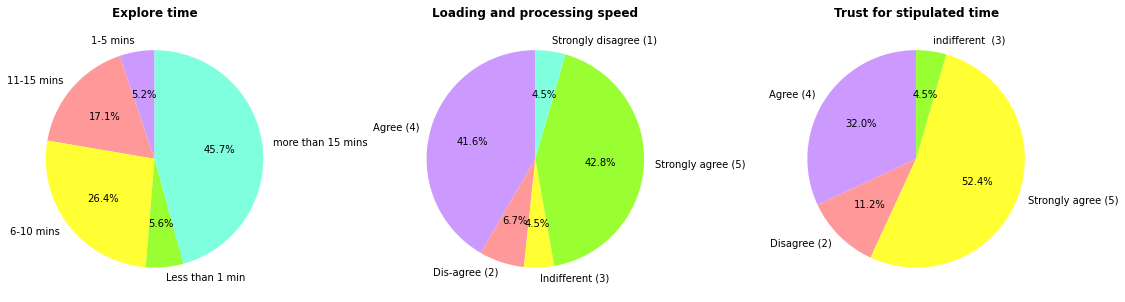

In [24]:
time_list=['Explore time','Loading and processing speed','Trust for stipulated time']
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
fig = plt.figure(figsize=(16,20))

for i in time_list: #loop to plot pie chart
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    df.groupby(i).size().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=colors)
    plt.title(i,fontweight='bold')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
    #print(i)
    #print(df[i].value_counts())
    #print('\n')
plt.show()


#### Observation for explore time:
    
* The majority share is for more than 15 minutes which clearly states that before making any purchase decision people tend to surf a lot on the websites/application wherein they can decide on what to buy.

* many people i.e.26.4% out of the total spent 6-10 minutes of time

* The least amount of time which was spent was less than a minute and between 1-5 minutes for which we can say the customer did not made any purchase as it is impossible for a person to buy within such a short span of time.There may be a possibility that the person visited the website and just closed it immediately or just surfed a bit on the website.


#### Observation for loading and processing

* From the above graph we can clearly state that the Customer strongly agree/beleive in having a good processing speed and loading time as low as possible.
* slow loading of the website may result in lack of customer attention.
* There are very few cases wherein people dis-agree with the negative effect of loading and processing speed on customer retention as it might also happen that the slow loading of web page is due to load on the website(during peak hours or during sales/promotions)

#### obseravtion for trust for stipulated time

* Therefore people strongly agree to the fact that the success of an online retail store to fulfill its part of the transaction at the stipulated time can gain customer trust.
* The share of people that "agree" to the same is also quite high(86 records)
* A very few people have indifferent views

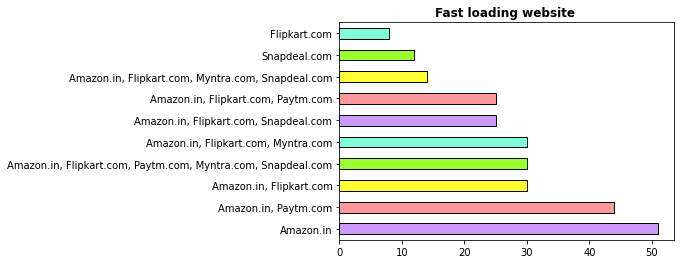

In [25]:
#Fast loading website speed of website and application
df['Loading time'].value_counts().plot(kind='barh',color= ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'],
                                       edgecolor='black')
plt.title("Fast loading website ",fontweight='bold')
plt.show()

#### As we can see the data is not clean we will seperate each website for ease of understanding and visualization.

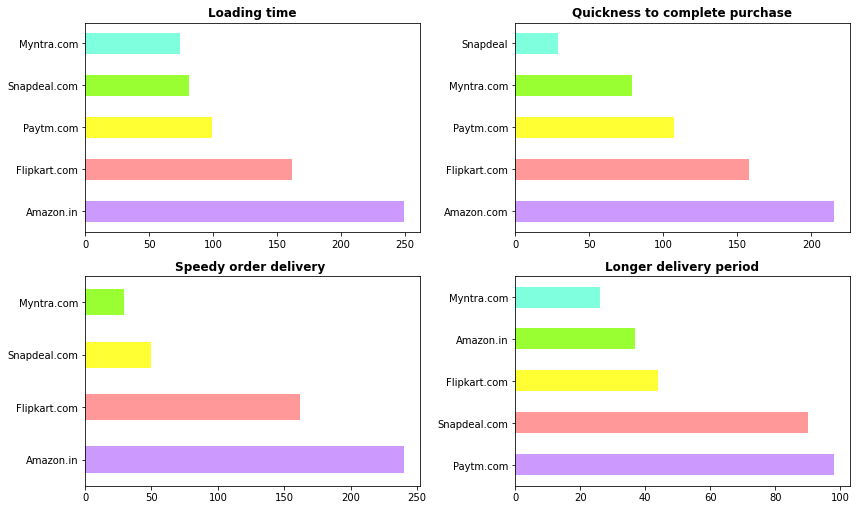

In [26]:
clean_list=['Loading time','Quickness to complete purchase','Speedy order delivery ','Longer delivery period']
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors 
fig = plt.figure(figsize=(12,14))
for i in clean_list: #loop to plot pie chart
    time=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    time=time.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"})
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    time.stack().value_counts().plot(kind='barh',color=colors)
    plt.ylabel("")
    plt.xticks(rotation=360)
#     print(i)
#     print(abc.stack().value_counts())
#     print('\n')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observation for loading time:

* Therefore we can conclude that the Fast loading website/application was amazon.in followed by flipkart

* Myntra has the lowest votes in terms of loading speed

#### Observation for quickness to complete purchase order:
    
* from the plot it is clearly visible that the amazon websites showed quickness to complete the purchase order the most.
* snapdeal was the one which got least votes for quickness to complete the purchase order

#### Observation for speed of delivery:
    
* people preffered amazon as the one providing speedy delivery 
* Flipkart too had many records in terms of speedy delivery
* Myntra can be seen as the slowest one

#### Observation for Longer delivery period:
* The fastest delivery was made by Myntra followed by amazon and flipkart

* Paytm and snapdeal took longer time in delivering the purchase orders to customers.

### Time analysis during the period of sale or promotions

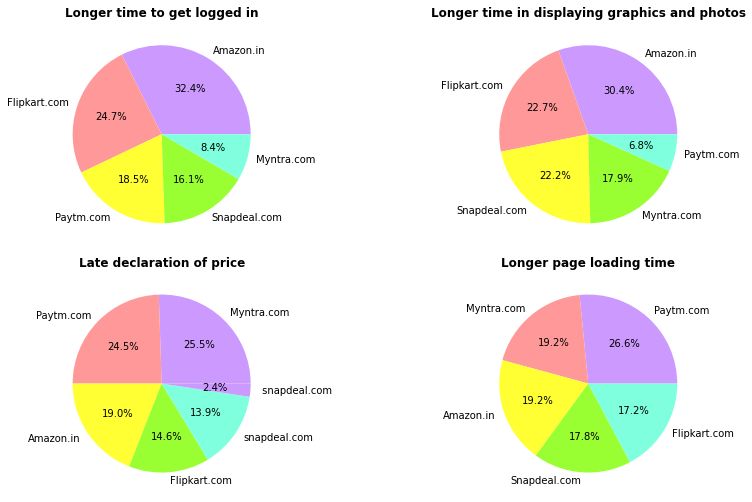

In [27]:
sales_time=['Longer time to get logged in','Longer time in displaying graphics and photos',
           'Late declaration of price','Longer page loading time']
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(12,14))
for i in sales_time: #loop to plot pie chart
    time=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    time=time.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"})
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    time.stack().value_counts().plot(kind='pie',colors=colors,autopct='%1.1f%%')
    plt.ylabel("")
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observation for  Longer time to get logged in (promotion, sales period):
    
* Amazon website/application consumed more time to log in 
* The fastest log in took place in Myntra
* Flipkart also took longer time to log in

#### Observation for  Longer time in displaying graphics and photos (promotion, sales period):
    
* Most of the people mentioned amazon and flipkart as the websites which takes longer time in displaying the graphics and photos
* Paytm was quick and took less time as compared to others

#### Observation for  Late declaration of price (promotion, sales period)  :
    
* Snapdeal was the first to declare the prices during the period of sales and promotions
* Myntra and paytm declared the prices late

#### Observation for  Longer page loading time (promotion, sales period):
    
* Flipkart was quite quick in terms of loading the content of page during sales the promotions
* Paytm was slow.
* Myntra and amazon aslo took longer time in loading the web page.
* Snapdeal and flipkart had almost similar records in the dataset

#  Analysis of hedonic values:
    

#### * Few of the examples of hedonic values are  
   * Gratifaction
   * Roles
   * Best deal
   * social status
   * adventure etc

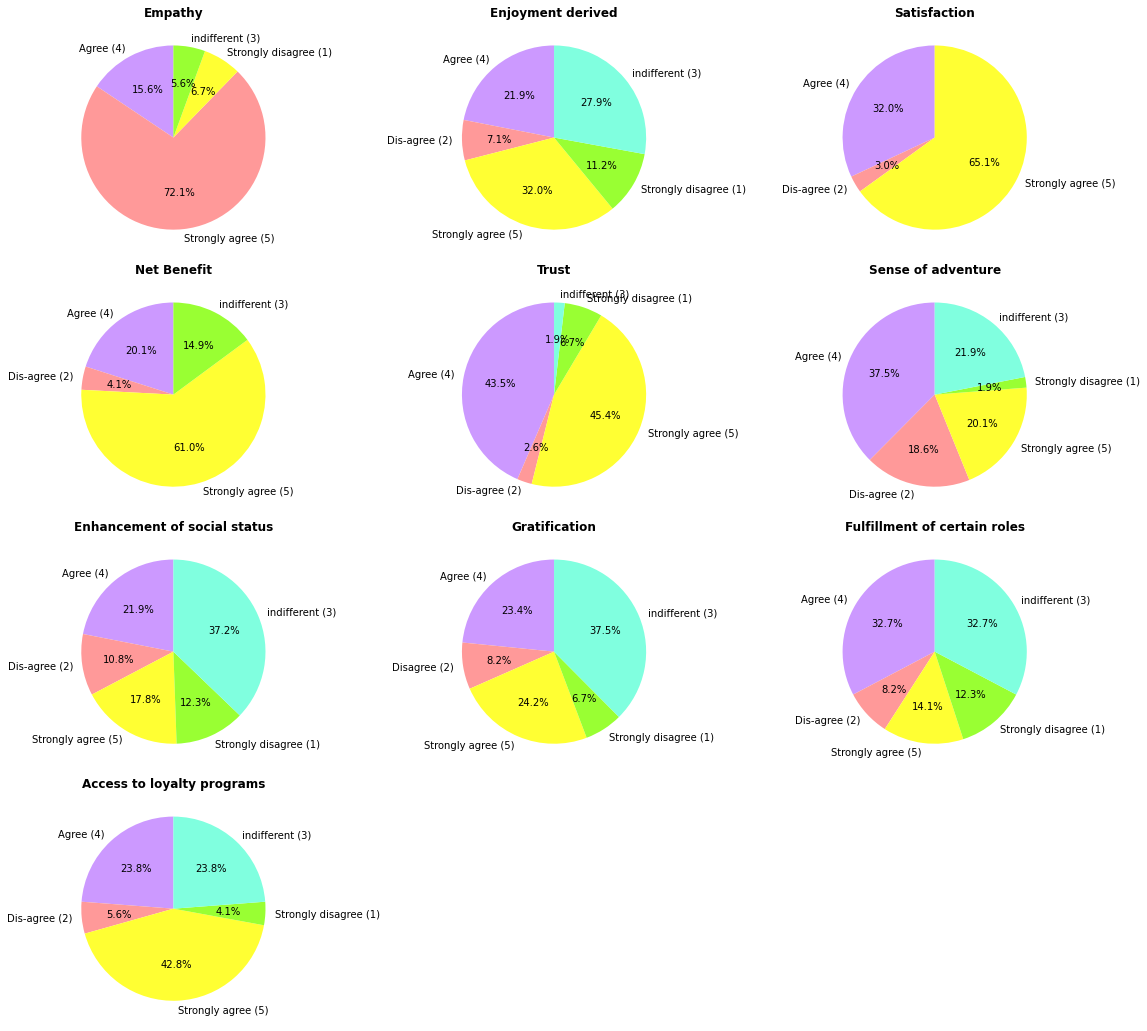

In [28]:
#plotting count of each website
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
fig = plt.figure(figsize=(16,18))
#list to make pie-charts
list1=['Empathy','Enjoyment derived','Satisfaction','Net Benefit','Trust','Sense of adventure',
      'Enhancement of social status', 'Gratification','Fulfillment of certain roles','Access to loyalty programs']
#titles as per the detailed description
for i in list1: #loop to plot pie chart
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    df.groupby(i).size().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=colors)
    plt.title(i,fontweight='bold')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
#     print(i)
#     print(df[i].value_counts())
#     print('\n')
plt.show()

#### Observation for empathy (readiness to assist with queries) towards the customers:
    
* About 72 % people feel that empathy (readiness to assist with queries) towards the customers is an important aspect for customer retention.

* A very small portion of the population i.e 6~7% have indifferent views for the same.

* The majority could be seen agreeing to the fact.

#### Observation for Is Enjoyment derived from shopping online : 
    
* Majority of share represents the strong agreement that means people do enjoy online shopping.
* 27.9% of the records says people have indifferent views on the same.

* A very few people could be seen neglecting the enjoyment factor derived from online shopping.i.e 11.2%(strongly disagree)

#### Observation for Do User derive satisfaction while shopping on a good quality website or application ?:
    
* Thus majority of the are satisfied while shopping if the quality of website or application is good.
* The survey states that there are no people who would like the quality of retail website to be in poor condiition.

#### Observation for Net Benefit derived from shopping online can lead to users satisfaction:
    
* Thus 61% which is the majority of population beleives that satisfaction is achieved if the net benefits derived are good.
* 40 people had in-different views for the same
* Also 11 of them disagree that the net Benefit derived from shopping online can lead to users satisfaction

#### Observation for trust :
    
* 45.4 % which is the majority of population beleives that trust is an important hedonic value for customer retention
* 1.9% people had in-different views for the same
* Also 2.6%  of them disagree that the trust can lead to users retention

#### Conclusion

* Similarly for adventure gratifaction,enhancement of scocial status and fullfillment of roles most of the respondents voted for "agree"and "strongly agree" which shows how the people percieve online shopping.
* Thus maximum number of people strongly beleive that gaining access to loyalty programs is an added benefit of shopping online





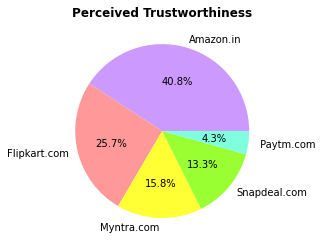

Amazon.in       227
Flipkart.com    143
Myntra.com       88
Snapdeal.com     74
 Paytm.com       24
dtype: int64


In [29]:
#split the data into individual columns as per number of unique entries
perceived_trust=df['Perceived Trustworthiness'].str.split(",",expand=True)

#replacing the mis typed entries
perceived_trust=perceived_trust.replace({" Flipkart.com":"Flipkart.com"," Myntra.com":"Myntra.com",
                           " Snapdeal.com":"Snapdeal.com"," Patym.com":"Paytm.com",
                            "Patym.com":"Paytm.com"})

#visualization
perceived_trust.stack().value_counts().plot(kind='pie',colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'], 
                                      autopct='%1.1f%%')
plt.title('Perceived Trustworthiness',fontweight='bold')
plt.xticks(rotation=360)
plt.ylabel("")
plt.show()
print(perceived_trust.stack().value_counts())

#### Observation:
    
* Amazon was top rated in terms of trust 40.8% people upvoted for amazon.
* Paytm received the least number of votes in terms of perceived trust.
* flipkart acheived 25.7% which was the second largest

### Analysis of various features related to Payment 

#### What is the preferred payment Option?

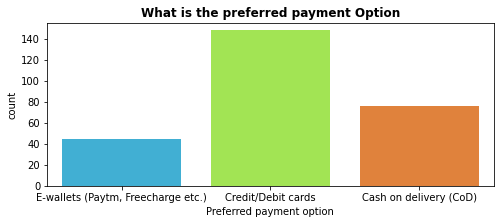

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Preferred payment option, dtype: int64


In [30]:
plt.figure(figsize=(8,3))
sns.countplot(df['Preferred payment option'],palette='turbo')
plt.title("What is the preferred payment Option",weight='bold')
plt.show()
print(df['Preferred payment option'].value_counts())

#### Observation:
    
* The survey says most of the peoplpe preferred payment using Credit/Debit cards
* 76 people out of the total preferred for Cash on Delivery (COD)
* Very few people used E-wallets (Paytm,Freecharge etc)

#### Convenient Payment methods

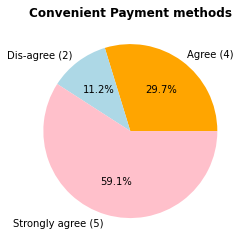

In [31]:
df.groupby('Convenient Payment methods').size().plot(kind='pie',autopct='%1.1f%%',
                                                     colors=['orange','lightblue','pink'])
plt.ylabel("")
plt.title('Convenient Payment methods',weight='bold')
plt.show()

#### observation:
    
* 59.1 % of the entire population strongly beleive that convenient payment methods are must for satisfaction of the customers

* There are no indifferent votes for this feature
* A vey small percentage i.e 11.2% Dis-agree with the same

#### Availability of several payment options

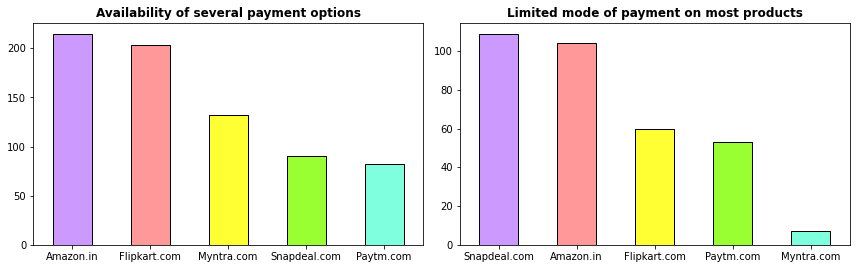

In [32]:
payment_options=['Availability of several payment options','Limited mode of payment on most products']
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf']
fig = plt.figure(figsize=(12,14))
for i in payment_options: #loop to plot pie chart
    pay=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    pay=pay.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"," Patym.com":"Paytm.com","Patym.com":"Paytm.com"})
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    pay.stack().value_counts().plot(kind='bar',color=colors,edgecolor="black")
    plt.ylabel("")
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observation for availability of several payment options:
    
* "Amazon.in" and "FlipKart.com" provided a wide variety of payment options on their website/application.
* "Paytm.com" had the least payment options available
* people also voted "Snapdeal.com" for less number of payment options available

#### Observation for Limited mode of payment on most products (promotion, sales period):
    
* snapdeal and amazon had very Limited mode of payment on most products (promotion, sales period)
* Myntra provided various modes of payment even during the period of promotions and sales

### Analysis of features related to privacy and security

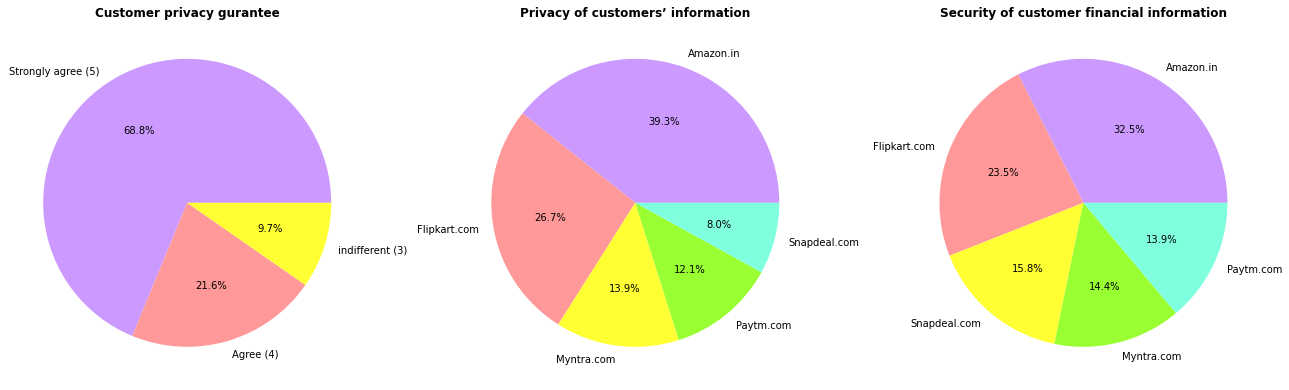

In [33]:
privacy_security=['Customer privacy gurantee','Privacy of customers’ information',
                  'Security of customer financial information']
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(18,14))
for i in privacy_security: #loop to plot pie chart
    
    #plt.xlabel(i)
    abc=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    abc=abc.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"})
    
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    abc.stack().value_counts().plot(kind='pie',colors=colors,autopct='%1.1f%%')
    plt.ylabel("")
    plt.xticks(rotation=360)
#     print(i)
#     print(abc.stack().value_counts())
#     print('\n')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observations for 'Customer privacy gurantee'
* Maximum people agree that the online retail websites should be able to maintain the privacy of customer.
* 26 people (9.7%) were neutral i.e had indifferent views

#### Observations for 'Privacy of customers’ information':
* Maximum number of records states that amazon and flipkart were able to maintain Privacy of customers’ information.
* Paytm and snapdeal received poor reviews in terms of Privacy of customers’ information

#### observations for 'Security of customer financial information'
* Thus amazon and flipkart provided good security for customers financial information
* Moderate number of people voted for Snapdeal as well as a secure website.
* Myntra and paytm were not good in terms of security

# utilitarian value 
* Product offerings
* Convenience
* product information
* Monetary savings

### 1)  Analysis of monetary savings and features related to money

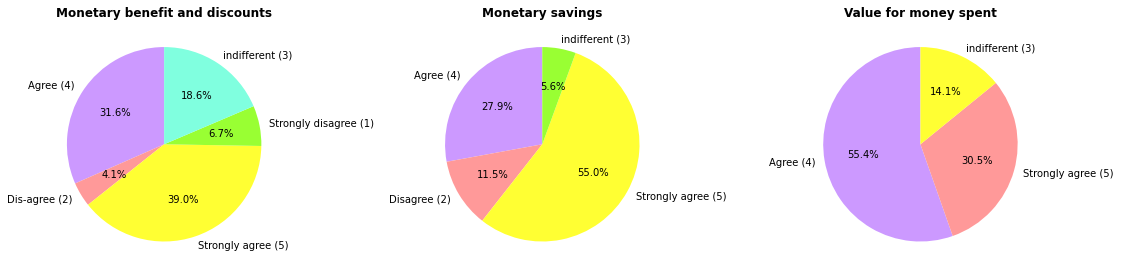

In [34]:
monetary_savings=['Monetary benefit and discounts','Monetary savings','Value for money spent']
#plotting count of each website
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(16,18))
for i in monetary_savings: #loop to plot pie chart
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    #plt.xlabel(i)
    df.groupby(i).size().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=colors)
    plt.title(i,fontweight='bold')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### observations:
    
* From all the 3 plots above it is quite clear that people usually prefer saving money and tend to get attracted for higher monetary savings
* There are very few records of "Disagree" and "strongly disagree" in all the above features.
* Few people have indifferent point of view as it might be possible that a product that leads to monetary savings would demand compromise with the quality

### 2) Convenience

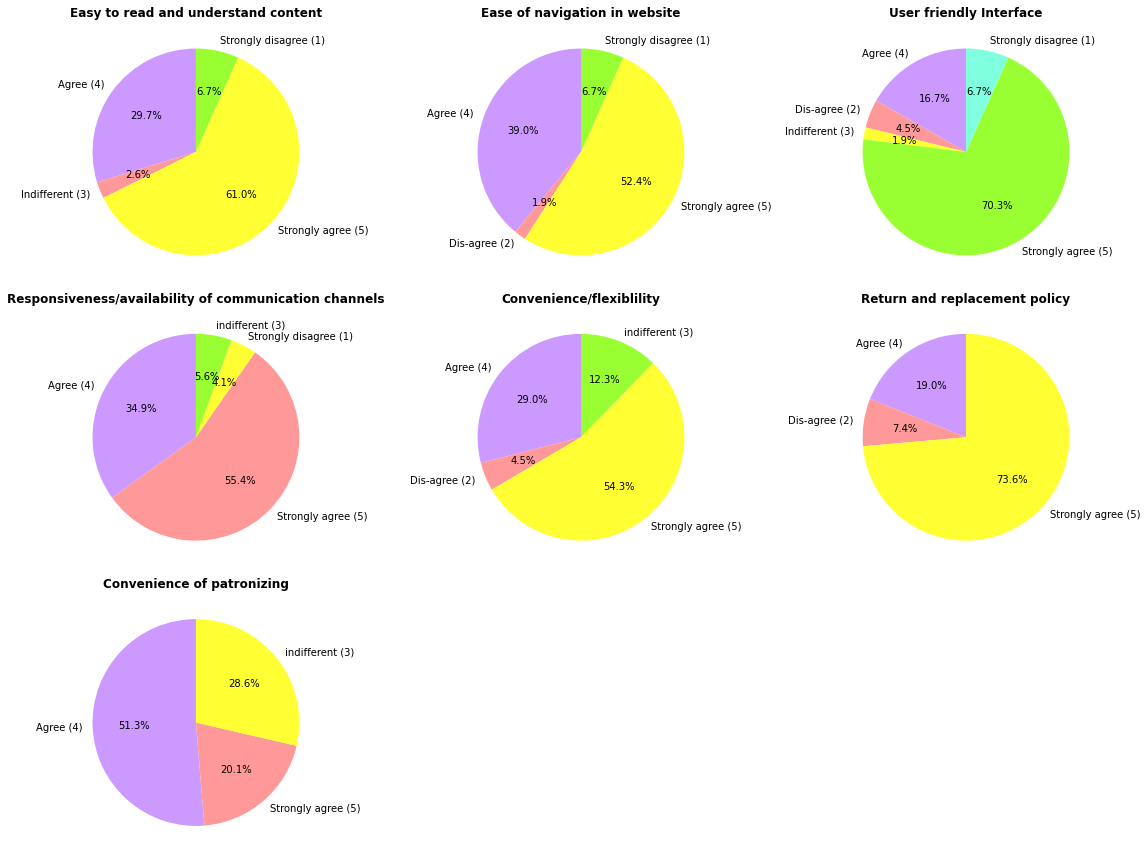

In [35]:
convenience=['Easy to read and understand content','Ease of navigation in website',
            'User friendly Interface','Responsiveness/availability of communication channels',
             'Convenience/flexiblility','Return and replacement policy',
            'Convenience of patronizing']
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(16,16))
for i in convenience: #loop to plot pie chart
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    #plt.xlabel(i)
    df.groupby(i).size().plot(kind='pie',startangle=90,autopct='%1.1f%%',colors=colors)
    plt.title(i,fontweight='bold')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observation:
    
* Frome the plot above it is visible that the majority share belongs to "agree" and "strongly agree".which states that people strongly believe in e-retail websites to be convenient.
* Various factors that led to convenience were Easy to read and understand content,Ease of navigation in website',User friendly Interface,Responsiveness/availability of communication channels,Convenience/flexiblility,Return and replacement policy,and Convenience of patronizing.
* People are more satisfied if there are good provisions for return and refund on the purchase orders.
* In case if the customer faces any query during the time he is exploring/purchasing from the website there should be proper communication channels for quick response. 
* The content should be easily understood and read in order to avoid confusion
* User-friendly interface ensures that the person accessing website feels it easy to understand and use the application/interface
* Ease in navigating the web pages and flexibility increases the overall user- interface

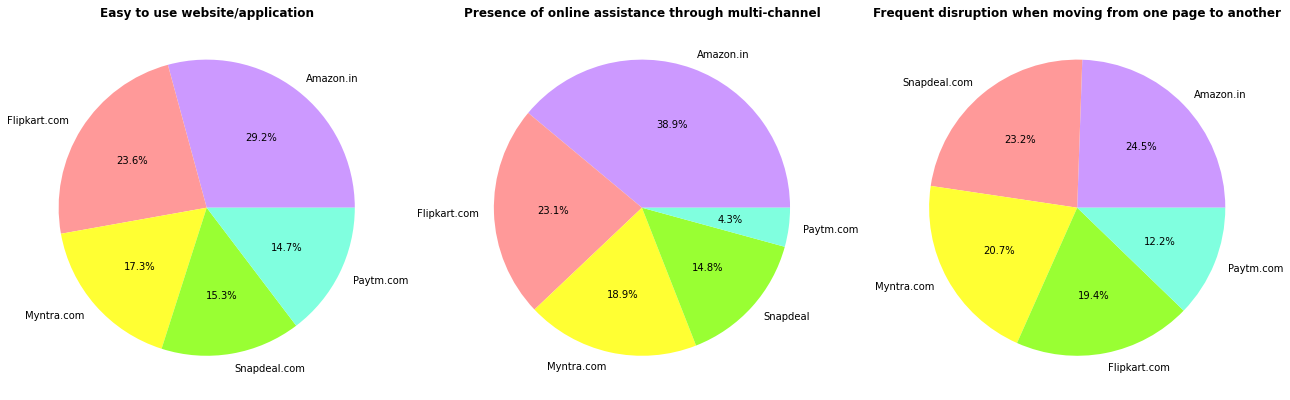

In [36]:
conv2=['Easy to use website/application','Presence of online assistance through multi-channel',
      'Frequent disruption when moving from one page to another']
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(18,14))
for i in conv2: #loop to plot pie chart
    
    #plt.xlabel(i)
    abc=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    abc=abc.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"})
    
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    abc.stack().value_counts().plot(kind='pie',colors=colors,autopct='%1.1f%%')
    plt.ylabel("")
    plt.xticks(rotation=360)
#     print(i)
#     print(abc.stack().value_counts())
#     print('\n')
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observation:
    
* Thus amazon and flipkart were considered more convenient in terms of ease of use ,presence of online assistance.
* There were freqeunt distruptions while moving from one page to another in amazon and myntra.
* Amazon provided great online assistance from various channels.
* Paytm has shown smooth transaction while moving between pages

# 3. Product information

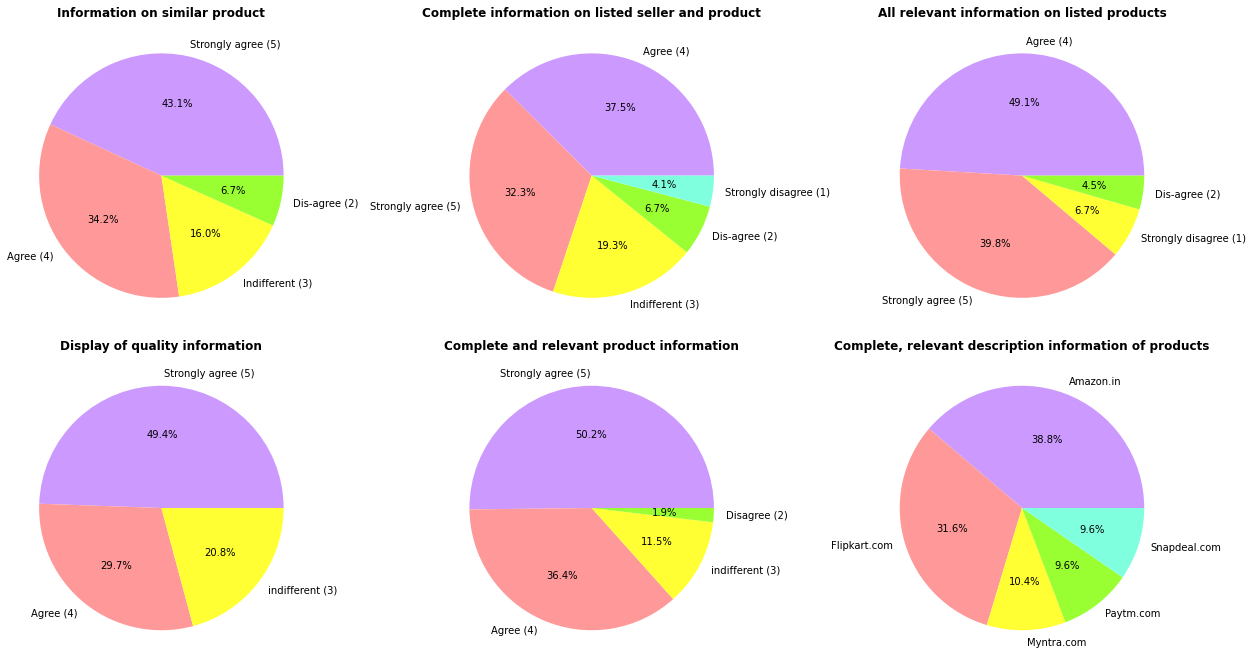

In [37]:
info=['Information on similar product','Complete information on listed seller and product',
     'All relevant information on listed products','Display of quality information',
     'Complete and relevant product information','Complete, relevant description information of products']
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(18,14))
for i in info: #loop to plot pie chart
    
    #plt.xlabel(i)
    abc=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    abc=abc.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"})
    
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    abc.stack().value_counts().plot(kind='pie',colors=colors,autopct='%1.1f%%')
    plt.ylabel("")
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observations:
    
* from the first four pie charts it is very clear that the highest percentage is dedicated to "Strongly agree" and "agree",which states that people usually look for e-retail websites which can successfully provide complete and relevant information on all the products,the information should be clearly stated so that customers can compare each product's information and make purchase decision.
* Thus displaying quality information will ultimately lead to customer satisfaction
* Among all the mentioned e-retail website "Amazon" and "Flipkart" provided good piece of information on their products.
* Myntra Snapdeal and paytm did not provided much relevant information on the products.

### Miscellaneous features

#### How often do you abandon (selecting an items and leaving without making payment) your shopping cart? and abandon reason

Abandon frequency
Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: Abandon frequency, dtype: int64


Abandon reason
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Abandon reason, dtype: int64




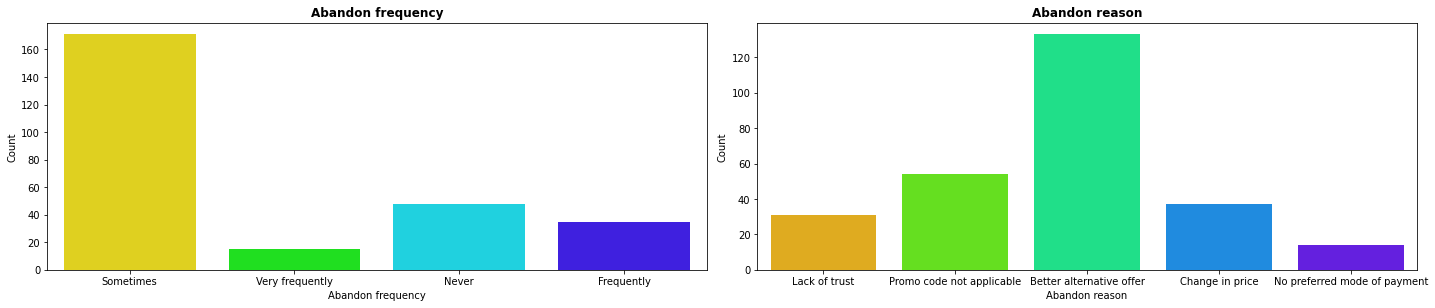

In [38]:
abandoment=['Abandon frequency','Abandon reason']
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(20,16))
for i in abandoment: #loop to plot 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    sns.countplot(df[i],palette='gist_rainbow')
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("Count")
    print(i)
    print(df[i].value_counts())
    print('\n')
plt.show()

#### Observation:
    
* There very less number of abandonments i.e 171
* 48 records says people never abandoned the purchase
* 15 people abandoned the cart very frequently and 35 of them abandoned frequently

#### Observation for "Why did people abandon the “Bag”, “Shopping Cart”?:

* Maximum number of people abandoned the cart due to better alternative offer available.
* The second most important reason for abandon was non availability of promo code 
* Number of Abandon caused due to change in price and lack of trust was almost same
* Minimum abandonment took place if there was no preferred mode of payment available.

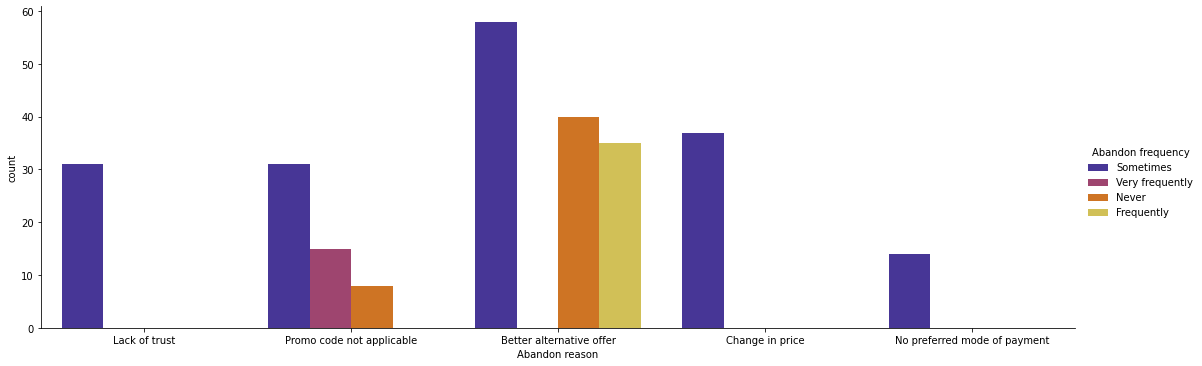

Abandon reason                Abandon frequency
Better alternative offer      Sometimes            58
                              Never                40
                              Frequently           35
Change in price               Sometimes            37
Lack of trust                 Sometimes            31
No preferred mode of payment  Sometimes            14
Promo code not applicable     Sometimes            31
                              Very frequently      15
                              Never                 8
Name: Abandon frequency, dtype: int64


In [39]:
#abandon reason v/s abandon frequency
sns.catplot(x='Abandon reason',kind="count",hue="Abandon frequency",
            palette='CMRmap', data=df,height=5,aspect=3,)
plt.show()
print(df.groupby('Abandon reason')['Abandon frequency'].value_counts())

#### Observation
* The abandom took place very few times(sometimes) due to 1)Lack of trust 2)Change in price and 3) No preferred mode of payment.
* Abandon was maximum(very frequently) only when the promocode wasn't available.
* Customer also frequently abandoned if better alternative offer was present

#### Frequency table

In [40]:
abandon_freq_table=pd.crosstab(index=df['Abandon reason'],
                               columns=df['Abandon frequency'],margins=True)
abandon_freq_table

Abandon frequency,Frequently,Never,Sometimes,Very frequently,All
Abandon reason,,,,,
Better alternative offer,35,40,58,0,133
Change in price,0,0,37,0,37
Lack of trust,0,0,31,0,31
No preferred mode of payment,0,0,14,0,14
Promo code not applicable,0,8,31,15,54
All,35,48,171,15,269


#### Finding the relationship between 2 variables:

In [41]:
# In order to understand the parameters and the result of the chi2_contingency function, you can use the help(chi2_contingency) command
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['Abandon reason'],df['Abandon frequency']))

(147.35048309532766,
 1.953217672897447e-25,
 12,
 array([[17.30483271, 23.73234201, 84.5464684 ,  7.41635688],
        [ 4.81412639,  6.60223048, 23.5204461 ,  2.06319703],
        [ 4.03345725,  5.53159851, 19.7063197 ,  1.72862454],
        [ 1.82156134,  2.49814126,  8.89962825,  0.78066914],
        [ 7.0260223 ,  9.63568773, 34.32713755,  3.01115242]]))

* Here the p-value is 0.01 thus we can reject the null hypothesis (that there is no relation between)the two

#### Offering a wide variety of listed product in several category

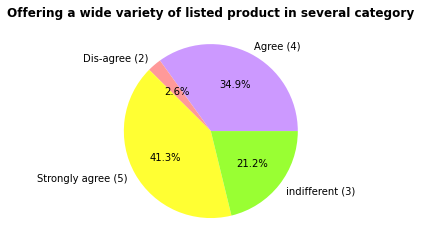

In [42]:
df.groupby('Wide variety of listed product').size().plot(kind='pie',colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'], 
                                    autopct='%1.1f%%')
plt.title("Offering a wide variety of listed product in several category",weight='bold')
plt.ylabel("")
plt.show()

#### Observations
* People are more attracted to e-retail shopping if there is a wide variety of products in several categories.
* 41.3% is the largest share which defines the population that strongly agrees.
* Only a 2.6% poeple of total population disagree to the same

#### From the following, tick any (or all) of the online retailers you have shopped from;   

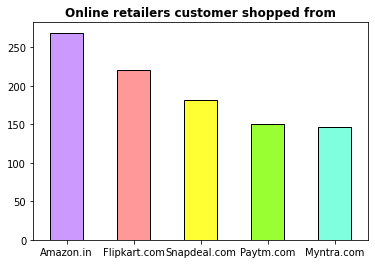

Amazon.in       269
Flipkart.com    221
Snapdeal.com    182
Paytm.com       150
Myntra.com      146
dtype: int64


In [43]:
# #split the data into individual columns as per number of unique entries
shopped_from=df['Online retailers customer shopped from'].str.split(",",expand=True)

# #replacing the mis typed entries
shopped_from=shopped_from.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com'})

# #visualization
shopped_from.stack().value_counts().plot(kind='bar',color=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'], 
                                      edgecolor='black')
plt.title('Online retailers customer shopped from',fontweight='bold')
plt.xticks(rotation=360)
plt.show()
print(shopped_from.stack().value_counts())

#### Observation:
    
* Most of the people had shopped from amazon and flipkart.
* Snapdeal and paytm was used on an average 
* Myntra had comparatively less votes

#### Visual appeal of the website

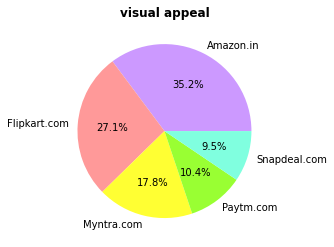

Amazon.in       227
Flipkart.com    175
Myntra.com      115
Paytm.com        67
Snapdeal.com     61
dtype: int64


In [44]:
# #split the data into individual columns as per number of unique entries
visual_appeal=df['visual appeal'].str.split(",",expand=True)

# #replacing the mis typed entries
visual_appeal=visual_appeal.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com'})

# #visualization
visual_appeal.stack().value_counts().plot(kind='pie',colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'], 
                                      autopct='%1.1f%%')
plt.title('visual appeal',fontweight='bold')
plt.xticks(rotation=360)
plt.ylabel("")
plt.show()
print(visual_appeal.stack().value_counts())

#### Observation

* Visual appeal is what meets the eye. It's the colors, shapes, pictures, fonts, white space, and overall visual balance of a design. Whether a website appeals to us affects how we perceive it, how we use it, and how we remember it
* Amazon and flipkart were the one's who were considered visually appealing by the customers.
* paytm and snapdeal were less attractive and seeks less attention  

#### Change in website/Application design and is the  Website as efficient as before

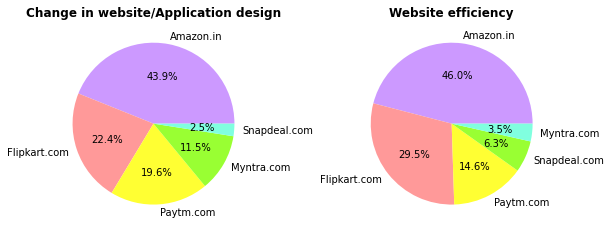

In [45]:
list_of_plots=['Change in website/Application design','Website efficiency']

a =1  # number of rows
b =3  # number of columns
c =1  # initialize plot counter
colors = ['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] # colors for the pie chart
fig = plt.figure(figsize=(12,8))
for i in list_of_plots: #loop to plot pie chart
    
    #plt.xlabel(i)
    abc=df[i].str.split(",",expand=True)
    #replacing the mis typed entries
    abc=abc.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com',' Snapdeal':"Snapdeal"})
    
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),weight='bold')
    abc.stack().value_counts().plot(kind='pie',colors=colors,autopct='%1.1f%%')
    plt.ylabel("")
    plt.xticks(rotation=360)
    c = c + 1
    plt.tight_layout()
    plt.ylabel("")
plt.show()

#### Observation:
    
* Amazon made more number of changes in the website or design and still maintained maximum efficiency.
* Snapdeal had the least changes in website/ application design its efficiency was 6.3%.
* Myntra was given the least efficiency

#### Wide variety of listed product

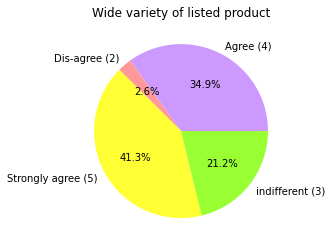

In [46]:
df.groupby('Wide variety of listed product').size().plot(kind='pie',colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'],
                                                        autopct='%1.1f%%')
plt.title('Wide variety of listed product')
plt.ylabel("")
plt.show()

#### Observation

* People tend to buy more from e-retail websites if there is a wide variety on the products that are listed.
* few people(21.2%) had indifferent views.
* A very small portion i.e.2.6 % dis-agreed that the variety will lead to customer retention.

#### 'Reliability'

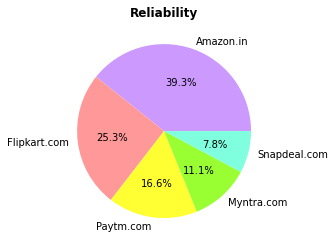

Amazon.in       227
Flipkart.com    146
Paytm.com        96
Myntra.com       64
Snapdeal.com     45
dtype: int64


In [47]:
# #split the data into individual columns as per number of unique entries
reliability=df['Reliability'].str.split(",",expand=True)

# #replacing the mis typed entries
reliability=reliability.replace({" Flipkart.com":"Flipkart.com"," Snapdeal.com":"Snapdeal.com"," Paytm.com":"Paytm.com",' Myntra.com':'Myntra.com'})

# #visualization
reliability.stack().value_counts().plot(kind='pie',colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'], 
                                      autopct='%1.1f%%')
plt.title('Reliability',fontweight='bold')
plt.xticks(rotation=360)
plt.ylabel("")
plt.show()
print(reliability.stack().value_counts())

#### Observations
* 39.35% people considered amazon as most reliable website for online purchasing which was the maximum.
* Flipkart had the second most highest votes in terms of reliability
* The least votes were given to snapdeal (7.8%)

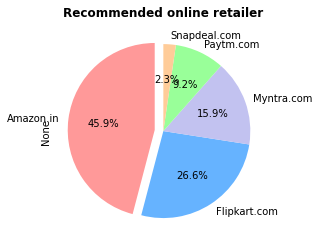

Count of recommendations for each website
Amazon.in       219
Flipkart.com    127
Myntra.com       76
Paytm.com        44
Snapdeal.com     11
dtype: int64


In [48]:
#split the data into individual columns as per number of unique entries
recommendation=df['Recommended online retailer'].str.split(",",expand=True)

#replacing the mis typed entries
recommendation=recommendation.replace({" Flipkart.com":"Flipkart.com"," Paytm.com":"Paytm.com",
                           " snapdeal.com":"Snapdeal.com"," Myntra.com":"Myntra.com"})

#visualization
#plt.figure(figsize=(10,6))
# only "explode" the 1st slice (i.e. 'amazon')
explode = (0.1, 0, 0, 0,0)  
#add colors 
colors = ['#ff9999','#66b3ff','#c2c2f0','#99ff99','#ffcc99']
recommendation.stack().value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%',
                                           explode=explode,colors=colors)
plt.title('Recommended online retailer',fontweight='bold')
plt.show()
print("Count of recommendations for each website")
print(recommendation.stack().value_counts())

#### Observation:
    
* 45.9 % of the total recommended "Amazon.in" as the best Indian online retailer.
* 26.6 % recommended Flipkart.com  as the best Indian online retailer.
* Sanpdeal received the least recommendations.
* Myntra and Paytm had a share of 15.9 % and 9.2 % respectively which was moderate in number

### Conclusion

#### The following points are inferred Upon analysis of all features related to the hedonic and utilitarian factors.
#### For hedonic values:
   * According to the survey most of the respondents are between the age of 21-41, which is probably the youngters exploring e-retailing websites for various products.
   * The fact that youngsters tend to maintain a good social status and fulfill certain roles they most likely prefer availing those websites which shall give them a sense of satisfaction and gratifaction too,along with great deals in picture.
   * Therefore to retain the customers in this span of age group the e-retail websites should focus on providing them with great deals,some really good products which shall satisfy their social status and inculcate a sense of adventure in them as to try new and diversified products.
    
#### For utilitarian Values:
   * The retailer should come up with new product offers in order to encash more and attract new customers
   * In this era of digitalization People today are more responsible and look for relevant information before making any purchase decision to avoid any loss hence it becomes an integral part for the e-retail websites to provide clear,detailed and relevant information on all the products.
   * Monetary benefits is of utmost importance as people demand value for money spent,hence in order to grab more customer or to retain the current one's retailers should consider the money factor and offer prety discounts on products,come up with some sort of sales/promotions.Also returns/replacement play an important role.
   
* Therefore we can conclude that the combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. 
    
#### From all the above plots and analysis it can be inferred that :

* the top-most Indian e-retail websites that satisfy the customers and are possibily successfull in customer retention are :Amazon and Flipkart

* Snapdeal and paytm could be seen grabing customer attention during the period of sales and promotions hence need improvement in other fields

* Myntra has as average amount of votes in almost all the factors considered.

* sanpdeal is the least recommended website


#### Thankyou